# Who are the Loyal Customers ? -- Customer Segmentation using RFM

#### In this problem we are trying to segment our customers into different segments like platinum, gold, silver etc accoridng to their loyalty. We are using the Recency,Frequency,Monetary value calculations to achieve this.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('D:/python learning/retail_segmentation.csv')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
#Grouping customers based on country

country_customer_data=df[['Country','CustomerID']].drop_duplicates()

In [10]:
country_customer_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [11]:
#Keep only united kingdom data

df=df.query("Country=='United Kingdom'").reset_index(drop=True)

In [12]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [13]:
#Check for missing values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [14]:
df=df[pd.notnull(df['CustomerID'])]

In [15]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
#validate if there are any negative values in Quantity column

df.Quantity.min()



-80995

In [17]:
#Check neg value for unit price

df.UnitPrice.min()

0.0

In [20]:
#Filter out values with negative

df=df[(df['Quantity']>0)]

In [22]:
df.Quantity.min()


1

In [23]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

<ipython-input-23-29f17a93c466>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


In [24]:
#Add new column called Total Amount

df['Total Amount']=df['Quantity']*df['UnitPrice']

<ipython-input-24-8d537aba6c60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Amount']=df['Quantity']*df['UnitPrice']


In [25]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


## Caculating Recency, Frequency, Monetary

In [27]:
#Recency = LatestDate - LastInvoice date ,
#Frequency =count of invoice number of transactions
#Monetary = Sum of total Amount for EACH customer


#Set latest date as 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase


import datetime as dt
Latest_date=dt.datetime(2011,12,10)

In [40]:
#Create RFM Modeling score for each customer

RFM_Scores=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date- x.max()).days, 'InvoiceNo': lambda x:len(x), 'Total Amount': lambda x:x.sum()})

In [41]:
#Convert Invoice date into type int
RFM_Scores['InvoiceDate']=RFM_Scores['InvoiceDate'].astype(int)


#Rename columns to recency, frequency and Monetary

RFM_Scores.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency','Total Amount':'Monetary'},inplace=True)

In [42]:
RFM_Scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


<AxesSubplot:ylabel='Density'>

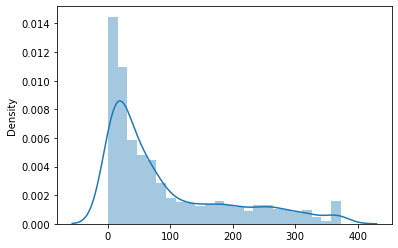

In [45]:
#recency distribution plot

sns.distplot(x=RFM_Scores['Recency'])

In [46]:
#Split into 4 segments using quantiles

quantiles=RFM_Scores.quantile(q=[0.25,0.5,0.75])

quantiles=quantiles.to_dict()


In [47]:
quantiles


,Recency,Frequency,Monetary
0.25,17.0,17.0,300.04
0.50,50.0,41.0,651.82
0.75,142.0,99.0,1575.89


In [49]:
#Function to create R, F, AMD M segments

def RScoring (x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    
        

In [50]:
## Calculate ADD R, F, M segment value columns in the existing datset to show R,F,M segment values


RFM_Scores['R']=RFM_Scores['Recency'].apply(RScoring,args=('Recency',quantiles,))
RFM_Scores['F']=RFM_Scores['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
RFM_Scores['M']=RFM_Scores['Monetary'].apply(FnMScoring,args=('Monetary',quantiles,))
RFM_Scores.head()



,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [53]:
#Combined RFM Value
RFM_Scores['RFM_GROUP']=RFM_Scores.R.map(str) + RFM_Scores.F.map(str)+RFM_Scores.M.map(str)

In [56]:
RFM_Scores['Score']=RFM_Scores[['R','F','M']].sum(axis=1)

In [57]:
RFM_Scores

,Recency,Frequency,Monetary,R,F,M,RFM_GROUP,Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12
18281.0,180,7,80.82,4,4,4,444,12
18282.0,7,12,178.05,1,4,4,144,9


In [58]:
#Assign Loyalty levels to each customer 

Loyalty_Level=['Platinum','Gold','Silver','Bronze']

In [60]:
Score_cuts=pd.qcut(RFM_Scores.Score,q=4,labels=Loyalty_Level)
RFM_Scores['RFM_Loyalty_Level']=Score_cuts.values
RFM_Scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_GROUP,Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


<AxesSubplot:xlabel='RFM_Loyalty_Level', ylabel='count'>

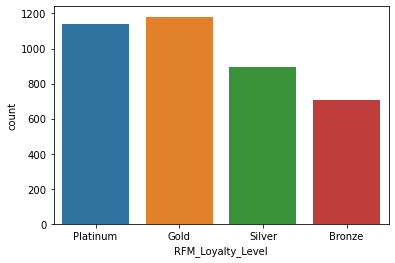

In [69]:
sns.countplot('RFM_Loyalty_Level',data=RFM_Scores)